In [1]:
import pandas as pd
df=pd.read_csv('/kaggle/input/harsense-datatset/SUb7_piklu.csv')

In [67]:
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.ensemble import VotingClassifier

In [2]:
import os
import pandas as pd

# Get a list of all CSV files in the current directory
input_files = [file for file in os.listdir('/kaggle/input/harsense-datatset/') if file.endswith('.csv')]

# Create an empty DataFrame to hold the merged data
merged_data = pd.DataFrame()
directory='/kaggle/input/harsense-datatset/'

# Read and concatenate data from all input CSV files
for input_file in input_files:
    df = pd.read_csv(directory+input_file)
    merged_data = pd.concat([merged_data, df], ignore_index=True)

# Output merged CSV file name
output_file = 'merged_file.csv'


# Save the merged DataFrame to a CSV file
merged_data.to_csv(output_file, index=False)

print('CSV files merged successfully.')


CSV files merged successfully.


In [3]:
df=pd.read_csv('/kaggle/working/merged_file.csv')
df.shape

(94198, 18)

In [5]:
# Drop the 'Axx-y' column
df.drop(columns=['Axx-Y'], inplace=True)

In [7]:
df['Acc-Y'].fillna(0, inplace=True)

In [9]:
df.isnull().sum()

AG-X         0
AG-Y         0
AG-Z         0
Acc-X        0
Acc-Y        0
Acc-Z        0
Gravity-X    0
Gravity-Y    0
Gravity-Z    0
RR-X         0
RR-Y         0
RR-Z         0
RV-X         0
RV-Y         0
RV-Z         0
cos          0
activity     0
dtype: int64

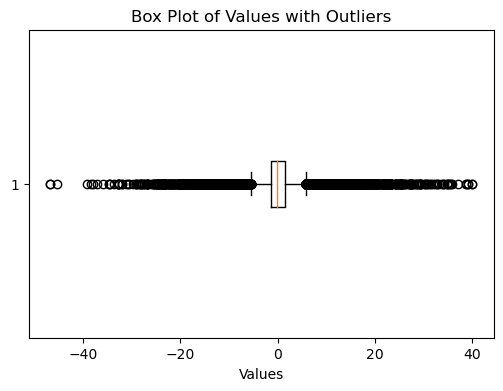

In [14]:
# Create a box plot
plt.figure(figsize=(6, 4))  # Optional: Set the figure size
plt.boxplot(df['AG-X'], vert=False)  # vert=False to create a horizontal box plot

# Add labels and title
plt.xlabel('Values')
plt.title('Box Plot of Values with Outliers')

# Show the plot
plt.show()

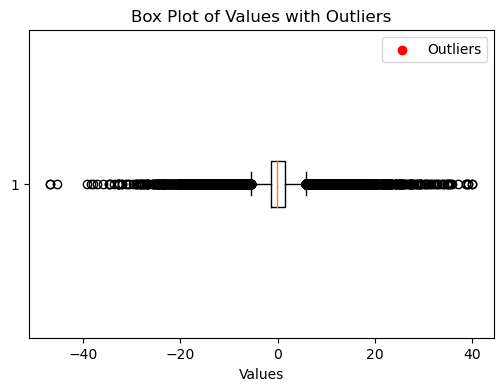

Outliers:
Empty DataFrame
Columns: [AG-X, AG-Y, AG-Z, Acc-X, Acc-Y, Acc-Z, Gravity-X, Gravity-Y, Gravity-Z, RR-X, RR-Y, RR-Z, RV-X, RV-Y, RV-Z, cos, activity]
Index: []


In [19]:
z_scores = stats.zscore(df['AG-X'])

# Define a threshold for identifying outliers (e.g., Z-score > 3 or < -3)
threshold = 30

# Find outliers
outliers = df[abs(z_scores) > threshold]

# Create a box plot
plt.figure(figsize=(6, 4))  # Optional: Set the figure size
plt.boxplot(df['AG-X'], vert=False)  # vert=False to create a horizontal box plot

# Highlight outliers on the plot
plt.scatter(outliers['AG-X'], [1] * len(outliers), color='red', label='Outliers')

# Add labels and title
plt.xlabel('Values')
plt.title('Box Plot of Values with Outliers')

# Show the plot
plt.legend()  # Show the legend with the "Outliers" label
plt.show()

# Print the outliers
print("Outliers:")
print(outliers)

In [20]:
df['activity'].value_counts()

Walking        23981
Sitting        18360
Running        14997
Standing       12418
upstaires      10764
downstaires     8487
Sleeping        2377
sitting         1424
walking         1390
Name: activity, dtype: int64

In [23]:
df.loc[df['activity'] == 'sitting', 'activity'] = 'Sitting'
df.loc[df['activity'] == 'walking', 'activity'] = 'Walking'

In [24]:
df['activity'].value_counts()

Walking        25371
Sitting        19784
Running        14997
Standing       12418
upstaires      10764
downstaires     8487
Sleeping        2377
Name: activity, dtype: int64

In [26]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categorical column
df['activity'] = label_encoder.fit_transform(df['activity'])

In [27]:
df['activity'].value_counts()

4    25371
1    19784
0    14997
3    12418
6    10764
5     8487
2     2377
Name: activity, dtype: int64

In [30]:
X = df[['AG-X', 'AG-Y', 'AG-Z', 'Acc-X', 'Acc-Y', 'Acc-Z', 'Gravity-X', 'Gravity-Y', 'Gravity-Z', 'RR-X', 'RR-Y', 'RR-Z', 'RV-X', 'RV-Y', 'RV-Z', 'cos']]
Y = df['activity']


In [33]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [34]:
k = 7  # Adjust the value of k as needed
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=7)

In [35]:
y_pred = knn_classifier.predict(X_test)


In [36]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9341295116772824
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.92      2997
           1       0.99      1.00      1.00      4041
           2       0.99      1.00      0.99       488
           3       0.98      0.99      0.99      2363
           4       0.90      0.96      0.93      5073
           5       0.88      0.78      0.83      1709
           6       0.86      0.84      0.85      2169

    accuracy                           0.93     18840
   macro avg       0.94      0.93      0.93     18840
weighted avg       0.93      0.93      0.93     18840



In [41]:
# Assuming you have already trained your XGBoost model and made predictions
xgb_classifier = xgb.XGBClassifier()  # Replace with your XGBoost model
xgb_classifier.fit(X_train, y_train)  # Assuming you have X_train and y_train
y_pred = xgb_classifier.predict(X_test)  # Assuming you have X_test

In [42]:
# Print classification report for additional metrics
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      2997
           1       1.00      1.00      1.00      4041
           2       1.00      1.00      1.00       488
           3       1.00      1.00      1.00      2363
           4       0.94      0.96      0.95      5073
           5       0.93      0.86      0.90      1709
           6       0.90      0.89      0.90      2169

    accuracy                           0.96     18840
   macro avg       0.96      0.95      0.96     18840
weighted avg       0.96      0.96      0.96     18840



In [49]:
random_forest_classifier = RandomForestClassifier()  # Replace with your Random Forest model
random_forest_classifier.fit(X_train, y_train)  # Assuming you have X_train and y_train
y_pred = random_forest_classifier.predict(X_test)

In [50]:
# Print classification report for additional metrics
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      2997
           1       1.00      1.00      1.00      4041
           2       1.00      1.00      1.00       488
           3       1.00      1.00      1.00      2363
           4       0.95      0.97      0.96      5073
           5       0.97      0.86      0.91      1709
           6       0.91      0.91      0.91      2169

    accuracy                           0.96     18840
   macro avg       0.97      0.96      0.96     18840
weighted avg       0.96      0.96      0.96     18840



In [51]:

svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)  # Assuming you have X_train and y_train
y_pred = svm_classifier.predict(X_test)

In [53]:
# Print classification report for additional metrics
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90      2997
           1       0.96      1.00      0.98      4041
           2       0.99      1.00      0.99       488
           3       0.85      0.96      0.90      2363
           4       0.71      0.93      0.80      5073
           5       0.83      0.43      0.57      1709
           6       0.82      0.39      0.53      2169

    accuracy                           0.84     18840
   macro avg       0.87      0.80      0.81     18840
weighted avg       0.85      0.84      0.82     18840



In [54]:

naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)  # Assuming you have X_train and y_train
y_pred = naive_bayes_classifier.predict(X_test)


In [55]:
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.66      0.74      2997
           1       0.95      0.86      0.91      4041
           2       1.00      0.98      0.99       488
           3       0.77      0.90      0.83      2363
           4       0.57      0.89      0.69      5073
           5       0.49      0.15      0.23      1709
           6       0.46      0.22      0.30      2169

    accuracy                           0.71     18840
   macro avg       0.72      0.67      0.67     18840
weighted avg       0.71      0.71      0.68     18840



In [56]:
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train)  # Assuming you have X_train and y_train
y_pred = decision_tree_classifier.predict(X_test)

In [57]:
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      2997
           1       1.00      1.00      1.00      4041
           2       1.00      1.00      1.00       488
           3       0.99      0.99      0.99      2363
           4       0.90      0.91      0.90      5073
           5       0.79      0.79      0.79      1709
           6       0.78      0.79      0.79      2169

    accuracy                           0.91     18840
   macro avg       0.91      0.91      0.91     18840
weighted avg       0.91      0.91      0.91     18840



In [58]:
gradient_boosting_classifier = GradientBoostingClassifier()
gradient_boosting_classifier.fit(X_train, y_train)  # Assuming you have X_train and y_train
y_pred = gradient_boosting_classifier.predict(X_test)

In [59]:
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      2997
           1       1.00      1.00      1.00      4041
           2       1.00      1.00      1.00       488
           3       0.99      0.99      0.99      2363
           4       0.81      0.95      0.87      5073
           5       0.86      0.66      0.75      1709
           6       0.82      0.66      0.73      2169

    accuracy                           0.90     18840
   macro avg       0.91      0.88      0.89     18840
weighted avg       0.90      0.90      0.89     18840



In [60]:
extra_trees_classifier = ExtraTreesClassifier()
extra_trees_classifier.fit(X_train, y_train)  # Assuming you have X_train and y_train
y_pred = extra_trees_classifier.predict(X_test)

In [61]:
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      2997
           1       1.00      1.00      1.00      4041
           2       1.00      1.00      1.00       488
           3       1.00      1.00      1.00      2363
           4       0.96      0.98      0.97      5073
           5       0.98      0.88      0.93      1709
           6       0.92      0.93      0.92      2169

    accuracy                           0.97     18840
   macro avg       0.97      0.97      0.97     18840
weighted avg       0.97      0.97      0.97     18840



In [66]:
# Define the neural network architecture
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),  # Input layer with the number of features
    keras.layers.Dense(128, activation='relu'),     # Hidden layer with 128 units and ReLU activation
    keras.layers.Dense(64, activation='relu'),      # Hidden layer with 64 units and ReLU activation
    keras.layers.Dense(7, activation='softmax')     # Output layer with 7 units (for 7 classes) and softmax activation
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

# Make predictions on the test data
y_pred = model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Print classification report for precision, recall, and F1-score
classification_rep = classification_report(y_test, y_pred_classes)
print("Classification Report:\n", classification_rep)


Epoch 1/40
1884/1884 [==============================] - 6s 3ms/step - loss: 0.5731 - accuracy: 0.7969 - val_loss: 0.4102 - val_accuracy: 0.8588
Epoch 2/40
1884/1884 [==============================] - 5s 3ms/step - loss: 0.3698 - accuracy: 0.8746 - val_loss: 0.3325 - val_accuracy: 0.8917
Epoch 3/40
1884/1884 [==============================] - 5s 3ms/step - loss: 0.3184 - accuracy: 0.8938 - val_loss: 0.3139 - val_accuracy: 0.9013
Epoch 4/40
1884/1884 [==============================] - 5s 3ms/step - loss: 0.2874 - accuracy: 0.9039 - val_loss: 0.2802 - val_accuracy: 0.9106
Epoch 5/40
1884/1884 [==============================] - 5s 3ms/step - loss: 0.2654 - accuracy: 0.9100 - val_loss: 0.2672 - val_accuracy: 0.9142
Epoch 6/40
1884/1884 [==============================] - 5s 3ms/step - loss: 0.2501 - accuracy: 0.9159 - val_loss: 0.2515 - val_accuracy: 0.9204
Epoch 7/40
1884/1884 [==============================] - 5s 2ms/step - loss: 0.2375 - accuracy: 0.9199 - val_loss: 0.2563 - val_accuracy:

In [69]:
models = [
    ('RandomForest', random_forest_classifier), 
    ('AdaBoost', adaboost_classifier),           
    ('gradient_boosting_classifier', gradient_boosting_classifier), 
    ('XGBoost', xgb_classifier),
    ('decision_tree_classifier',decision_tree_classifier),
    ('knn_classifier', knn_classifier),
    ('extra_trees_classifier',extra_trees_classifier),
]

# Create a VotingClassifier
voting_classifier = VotingClassifier(estimators=models, voting='hard')  # 'hard' for majority vote

# Fit the ensemble model on the training data
voting_classifier.fit(X_train, y_train)

# Make predictions with the ensemble model
y_pred = voting_classifier.predict(X_test)

# Calculate accuracy on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Model Accuracy: {accuracy*100:.2f}%")

Ensemble Model Accuracy: 96.28%


In [70]:
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      2997
           1       1.00      1.00      1.00      4041
           2       1.00      1.00      1.00       488
           3       1.00      1.00      1.00      2363
           4       0.93      0.98      0.95      5073
           5       0.96      0.87      0.91      1709
           6       0.94      0.88      0.91      2169

    accuracy                           0.96     18840
   macro avg       0.97      0.96      0.96     18840
weighted avg       0.96      0.96      0.96     18840

